In [1]:
# Test mammalian spacers in vitro (with controls)

Last time I tried to test Christof's mammalian spacers in vitro, they all seemed uniformly inactive.  However, that result was inconclusive because I forgot to order the controls, so I didn't have a baseline for how active those spacers were in the in vitro cleavage assay.  Now I have the controls, and I'm repeating the assay.

## Jan 23, 2017 (Monday)

In [2]:
!../protocols/in_vitro_transcription.py 10 -R -g

1. Wipe down your bench and anything you'll touch 
   (pipets, racks, pens, etc.) with RNaseZap.

2. Setup 10 in vitro transcription reactions by 
   mixing the following reagents at room temperature 
   in the order given.

   Reagent                  Conc  Each Rxn  Master Mix
   ───────────────────────────────────────────────────
   nuclease-free water            10.00 μL   110.00 μL
   reaction buffer         "10x"   1.50 μL    16.50 μL
   ATP                    100 mM   1.50 μL    16.50 μL
   CTP                    100 mM   1.50 μL    16.50 μL
   GTP                    100 mM   1.50 μL    16.50 μL
   UTP                    100 mM   1.50 μL    16.50 μL
   HiScribe T7 (NEB)       "10x"   1.50 μL    16.50 μL
   DNA template         10 ng/μL   1.00 μL            
   ───────────────────────────────────────────────────
                                  20.00 μL    19.00 μL/rxn

3. Incubate at 37°C (thermocycler) for 4 hours.

4. Remove unincorporated ribonucleotides using Zymo 
   RNA C

Construct | Yield (ng/μL)
--------- | ------------:
aavs on   |         323.9
aavs off  |         257.8
gfp on    |         599.9
gfp off   |         899.5
cf1 on    |         664.2
cf1 off   |         560.2
cf2 on    |         386.1
cf2 off   |         457.9
cf3 on    |         551.3
cf3 off   |         458.3

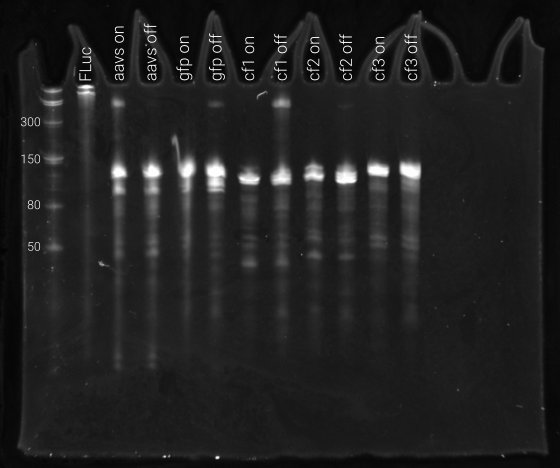

In [3]:
from IPython.display import Image
Image('../data/gels/annotated/20170123_transcribe_cf_controls.png', width=500)

The FLuc lane is the control RNA that came with the kit.  I made some because I had extra T7 master mix, and I thought maybe it'd tell me whether the kit or the template was responsiblt for the dirty DNA.  I didn't look to see how big it was though, and apparently it was too big for an 8% gel.

## Jan 24, 2017 (Tuesday)

In [4]:
!../protocols/cas9_cleavage_assay.py 4*5*2

1. Thaw the water, theophylline, 10x Cas9 buffer, 
   and target DNA on the 37°C heat block.  Thaw the 
   sgRNAs at room temperature, then refold them by
   incubating at 95°C for 3 min then 4°C for 1 min.

2. Setup 40 Cas9 reactions:

   Reagent     Conc  Each Rxn  Master Mix
   ──────────────────────────────────────
   water              5.05 μL   222.20 μL
   buffer       10x   1.50 μL    66.00 μL
   Cas9        1 μM   0.45 μL    19.80 μL
   ligand     30 mM   5.00 μL            
   sgRNA    1500 nM   1.50 μL            
   DNA        30 nM   1.50 μL            
   ──────────────────────────────────────
                     15.00 μL     7.00 μL/rxn

   - Add 5.00 μL water or ligand to each reaction.

   - Add 1.50 μL sgRNA to each reaction.

   - Add 7.00 μL Cas9 master mix to each reaction.

   - Incubate at room temperature for 10 min.

   - Add 1.50 μL DNA to each reaction.

3. Incubate at 37°C for 1 hour (thermocycler).

4. Add 3.0 μL 6x KAG master mix to each reaction:
    
  

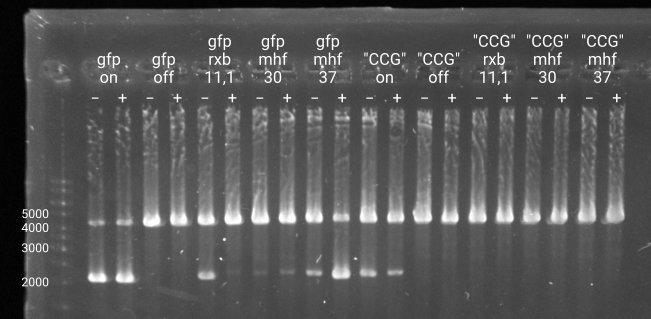

In [5]:
Image('../data/gels/annotated/20170124_cleave_cf_spacers_with_controls_1.png')

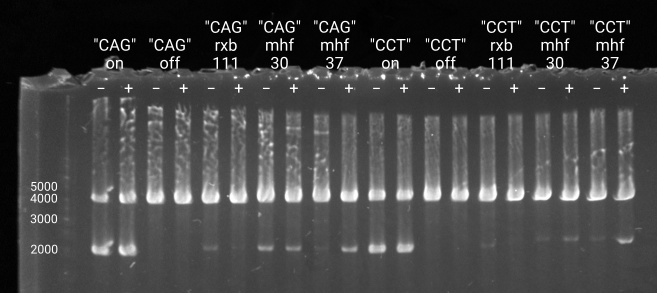

In [6]:
Image('../data/gels/annotated/20170124_cleave_cf_spacers_with_controls_2.png')

I still don't see any cleavage activity at all for the designs with the cf1 spacer.  Without the controls, this could've been due to an error ordering the spacer sequence, cloning the target DNA, pipeting the target DNA, or probably several other things.  With the controls, I think I can conclude that the designs just don't work with the cf1 spacer for some reason.

## Jan 26, 2017 (Thursday)

I want to make bar plots showing ligand sensitivity, scaled relative to the positive control.  I'll calculate the brightness of the bands using imagej.  I'm going to deal with the streakiness of the bands by subtracting the background (50 px radius) and trying to exclude the streak when I draw the baselines.

<IPython.core.display.Javascript object>


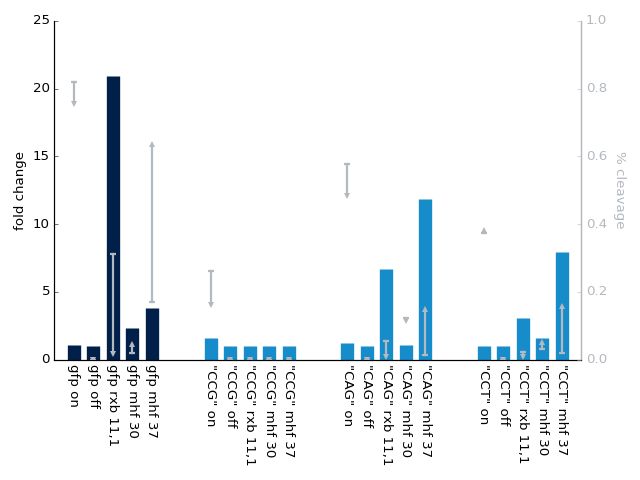

In [7]:
import sys; sys.path.append('20170123_test_mammalian_spacer_in_vitro')
from in_vitro_fold_change import plot_fold_change
plot_fold_change()

All three of the designs tested here work equally well in our bacterial CRISPRi assay, but `mhf 30` seems to work distinctly worse than the others in this cleavage assay.  We're not sure why this is.

We detected no cleavage for any of the designs with the "CCG" spacer, with or without theophylline.  We used `RNAfold`, an RNA secondary structure prediction program, to look for base-pairing between the "CCG" spacer and the sgRNA that could explain the lack of activity, but no such base-pairing was predicted.  The positive control for this spacer also has relatively weak cleavage, so it may be that this spacer just doesn't work that well in our assay and that we didn't detect any cleavage because the dynamic range is too small.  

In contrast, we observed reasonable activity for the `rxb 11,1` and `mhf 37` designs with the "CAG" and "CCT" spacers.  We believe that this activity is promising enough to justify testing these designs with these spacers in the mammalian cell assay.  Even for these guides, however, it's worth noting that the positive controls only achieved about 50% cleavage.

The conditions we used in this assay probably don't correlate at all to the conditions in the mammalian cell assay.  We had a 10-fold excess of Cas9 over target DNA, an 5-fold excess of sgRNA over Cas9, and a 66-fold excess of theophylline over sgRNA.  In other words, we expect that every interaction in our system was saturated.

I'm slightly cncerned about the quality of the RNA.  The transcription reactions were messy, but the brighest band was always close to the right molecular weight.  Since there's a pretty big excess of sgRNA in these reactions, minor amounts of truncated RNAs probably wouldn't affect the reaction too much.  What concerns me more is that the controls (especially "CGG" and "CAG") appear to be of different lengths.  That really seems wrong, but I don't know what I could do differently.  I ultimately decided not to worry about this since the positive control worked for each spacer, but I wouldn't be surprised if this was the reason why the "CGG" control is so weak.